## Understanding House Prices in Nigeria: A Market Overview

Real estate in Nigeria is a dynamic and growing sector, driven by factors such as population growth, urbanization, and increased demand for housing. However, house prices can vary significantly across regions, with cities like Lagos, Abuja, and Port Harcourt experiencing higher property values compared to other parts of the country.

In [1]:
#importing libraries needed

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#read the dataset
price = pd.read_csv('nigeria_houses_data.csv')

#view few rows
price.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [3]:
price[['bedrooms', 'bathrooms','toilets','parking_space', 'price']] = price[['bedrooms', 'bathrooms','toilets','parking_space','price']].astype(int)

### Understanding the columns

bedrooms -> number of bedrooms in the houses

bathrooms -> number of bathrooms in the houses

toilets -> number of toilets 

parking_space -> the total number of cars in the houses

title -> house type

town -> town in which the house is located

state -> state within Nigeria in which the house is located and finally

price -> the target column.

### Data Analysis


In [4]:
#the shape of the data

price.shape

(24326, 8)

24326 rows and 8 columns

In [5]:
#info of the data

price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       24326 non-null  int32 
 1   bathrooms      24326 non-null  int32 
 2   toilets        24326 non-null  int32 
 3   parking_space  24326 non-null  int32 
 4   title          24326 non-null  object
 5   town           24326 non-null  object
 6   state          24326 non-null  object
 7   price          24326 non-null  int32 
dtypes: int32(5), object(3)
memory usage: 1.0+ MB


3 object columns and 5 integer columns

In [6]:
#checking for missing values
price.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [7]:
#check for duplicates

price.duplicated().sum()

10451

The data has 10451 duplicates 

In [8]:
#statistics of the data

price.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,1.525279e+08
std,1.138497,1.163161,1.226253,1.399936,2.673468e+08
min,1.000000,1.000000,1.000000,1.000000,-2.147484e+09
25%,4.000000,4.000000,5.000000,4.000000,5.000000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,2.100000e+09


From the dataset, it is impossible to have a negative in thr price colun, let's check out for outliers

<AxesSubplot:>

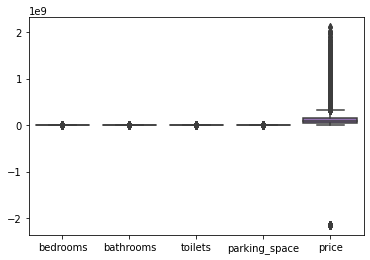

In [9]:
#check outliers
sns.boxplot(data = price)

This shows we have a lot of outliers in price column, let's clean that

In [10]:
# drop columns less than 0
price = price.drop(price[price['price'] <= 0].index)


In [11]:
# drop price greater than 200 million
price = price.drop(price[price['price'] > 200000000].index)

<AxesSubplot:>

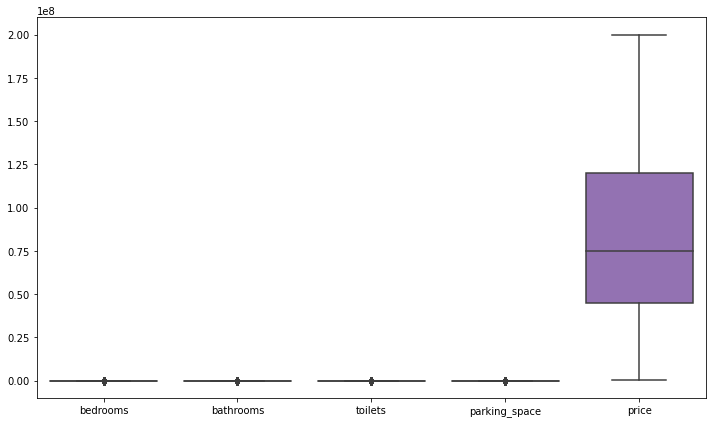

In [12]:
# checking the boxplot again
plt.figure(figsize=(12,7))
sns.boxplot(data = price)

In [13]:
# find out if we have rows that are not divisible by 10 and drop them
price = price.drop(price[~price['price'] % 10 == 0].index)

The dataset has no outliers anymore, let's the the number of rows the dataset has

In [14]:
price.shape

(19707, 8)

The dataset has 19,707 rows

### Data Cleaning

In the previous analysis, we have 10451 duplicates, let's drop them

In [15]:
#dropping duplicates

price.drop_duplicates(keep='first', inplace= True)

In [16]:
#check the shape again
price.shape

(11265, 8)

After dropping the duplicates the data has 11,265 rows

### Data Visualization

In [18]:
price_title = price['title'].value_counts(ascending=False)

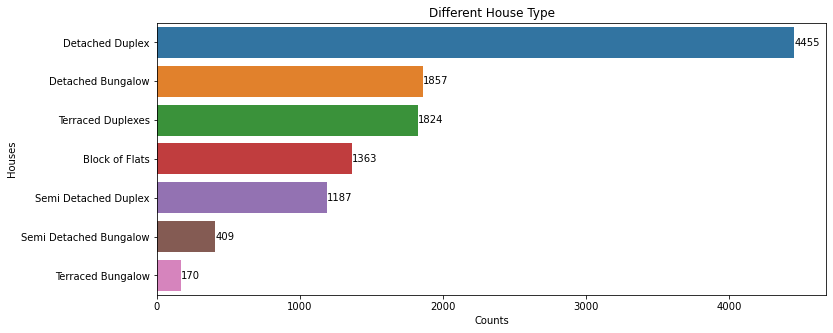

In [19]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x = price_title.values, y = price_title.index)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Different House Type')
plt.ylabel('Houses')
plt.xlabel('Counts')
plt.show()



In [20]:
price_state = price['state'].value_counts(ascending=False)

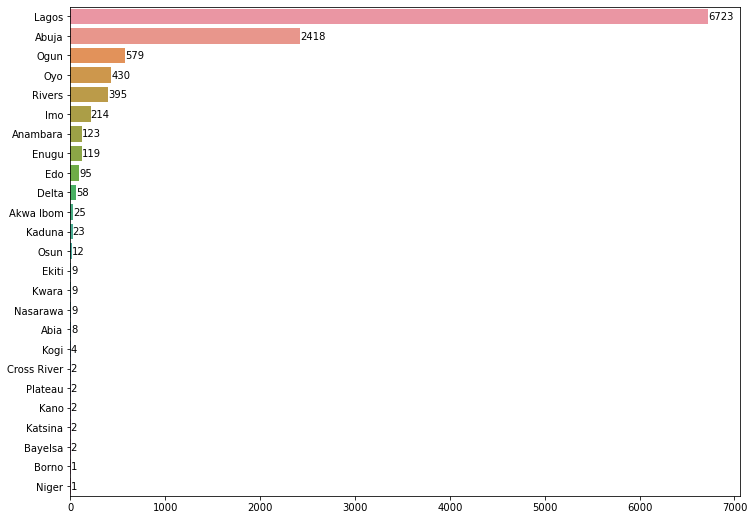

In [21]:

plt.figure(figsize=(12,9))
ax = sns.barplot(x = price_state.values, y = price_state.index)
for i in ax.containers:
    ax.bar_label(i,)

Let's check out Lagos, how many cities do we have

In [22]:
price_state_town = price[price['state'] == 'Lagos']

In [23]:
price_town = price_state_town['town'].value_counts(ascending=False)

Let's plot that

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


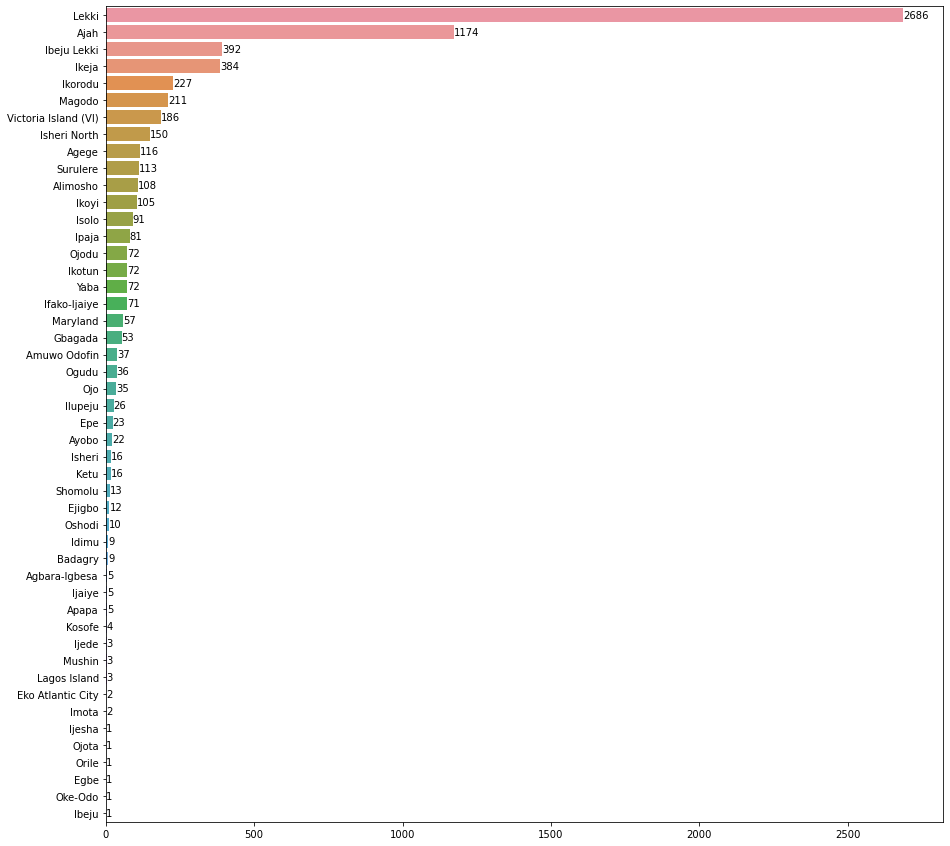

In [24]:
plt.figure(figsize=(15,15))

ax = sns.barplot(price_town.values, price_town.index)
for i in ax.containers:
    ax.bar_label(i,)

### Model Training

In [25]:
#importing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error, mean_squared_error

In [26]:
encoder  = LabelEncoder()
price['title']= encoder.fit_transform(price[['title']])

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Block of Flats, 0

Detached Bungalow, 1

Detached Duplex, 2

Semi Detached Bungalow, 3

Semi Detached Duplex, 4

Terraced Bungalow, 5

Terraced Duplexes, 6

In [27]:

price['town'] = encoder.fit_transform(price[['town']])


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Aba	0

Abeokuta North	1

Abeokuta South	2

Abraka	3 

Ado-Ekiti	4

Ado-Odo/Ota	5

Afijio	6

Agbara	7

Agbara-Igbesa	8

Agege	9

Ajah	10

Akinyele	11

Akure	12

Alimosho	13

Amuwo Odofin	14

Aniocha South	15


Apapa	16

Apo	17

Arepo	18

Asaba	19


Asokoro District	20

Ayobo	21

Badagry	22

Bwari	23

Calabar	24

Central Business District	25

Chikun	26

Dakibiyu	27

Dakwo	28

Danja	29

Dape	30

Dei-Dei	31

Dekina	32

Diplomatic Zones	33

Duboyi	34

Durumi	35

Dutse	36

Ede South	37

Egbe	38

Egbeda	39

Egor	40

Ejigbo	41

Eket	42

Eko Atlantic City	43

Eleme	44

Enugu	45


Epe	46


Ethiope West	47


Ewekoro	48


Gaduwa	49

Galadimawa	50

Garki	51

Gbagada	52

Gudu	53

Guzamala	54

Guzape District	55

Gwagwalada	56

Gwarinpa	57

Ibadan	58

Ibadan North	59

Ibadan North-East	60

Ibadan North-West	61

Ibadan South-West	62

Ibafo	63

Ibarapa North	64

Ibeju	65

Ibeju Lekki	66

Idimu	67

Ido	68

Idu Industrial	69

Ifako-Ijaiye	70

Ifo	71

Ijaiye	72

Ijebu Ode	73

Ijede	74

Ijesha	75

Ijoko	76

Ikeja	77

Ikorodu	78

Ikot Ekpene	79

Ikotun	80

Ikoyi	81

Ikpoba Okha	82

Ikwerre	83

Ilorin East	84

Ilorin South	85


Ilorin West	86

Ilupeju	87

Imota	88

Ipaja	89

Isheri	90

Isheri North	91

Isolo	92

Jabi	93

Jahi	94

Jikwoyi	95

Jos North	96

Jos South	97

Kabusa	99

Kado	100

Kaduna North	101

Kaduna South	102

Kafe	103

Kagini	104

Kano	105

Karmo	106

Karsana	107

Karshi	108

Karu	109

Katampe	110

Kaura	111

Keffi	112

Ketu	113

KM 46	98

Kosofe	114

Kubwa	115

Kuje	116

Kukwaba	117

Kurudu	118

Kusada	119

Kyami	120

Lagos Island	121

Lekki	122

Life Camp	123

Lokogoma District	124

Lokoja	125

Lugbe District	126

Mabushi	127

Magboro	128

Magodo	129

Maitama District	130

Mararaba	131

Maryland	132

Mbora (Nbora)	133

Mowe Ofada	134

Mowe Town	135

Mpape	136

Mushin	137

Nasarawa	138

Nassarawa	139

Nyanya	140

Obafemi Owode	141

Obio-Akpor	142

Ogijo	143

Ogudu	144

Ohaji/Egbema	145

Ojo	146

Ojodu	147

Ojota	148

Oke-Aro	149

Okene	151

Oke-Odo	150

Okpe	152

Oluyole	153

Oredo	154

Orile	155

Orozo	156

Oshodi	157

Osogbo	158

Ovia North-East	159

Owerri Municipal	160

Owerri North	161

Owerri West	162

Oyigbo	163

Oyo West	164

Paikoro	165

Port Harcourt	166

Sagamu	167

Sango Ota	168

Shomolu	169

Simawa	170

Surulere	171

Udu	172

Ughelli North	173

Ughelli South	174

Uhunmwonde	175

Umuahia	176

Utako	177

Uvwie	178

Uyo	179

Victoria Island (VI)	180

Warri	181

Wumba	182

Wuse	183

Wuse 2	184

Wuye	185

Yaba	186

Yenagoa	187

Yewa South	188


In [28]:
price['state'] = encoder.fit_transform(price[['state']])


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Abuja	1

Lagos	17
Edo	8

Ogun	20

Oyo	22

Imo	11

Anambara	3

Rivers	24

Enugu	10

Kaduna	12

Kwara	16

Nasarawa	18
Abia	0

Delta	7

Akwa Ibom	2

Osun	21

Ekiti	9

Cross River	6

Kogi	15

Plateau	23

Kano	13
Katsina	14

Bayelsa	4

Borno	5

Niger	19

In [29]:
price.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4,5,5,4,2,122,17,120000000
3,4,4,5,6,2,10,17,40000000
4,4,4,5,2,4,122,17,75000000
6,4,5,5,4,2,122,17,65000000
7,2,2,3,6,1,46,17,12000000


In [30]:
X = price.drop('price', axis = 1)
y = price['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Model Evaluation

In [32]:
linear_model = LinearRegression()
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=9)
rfr = RandomForestRegressor()
gbt = GradientBoostingRegressor()

#### Linear Regression

In [33]:

linear_model.fit(X_train, y_train)

linear_pred = linear_model.predict(X_test)

r2_score(y_test, linear_pred)


0.23374988055831525

#### DecisionTreeRegressor

In [34]:
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

r2_score(y_test, dt_pred)

0.3041508507541575

#### LogisticRegression

In [35]:
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

r2_score(y_test, lr_pred)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9999999873922036

#### RandomForestRegressor

In [36]:
rfr.fit(X_train, y_train)

rf_pred = rfr.predict(X_test)

r2_score(y_test, rf_pred)

0.4578894703138947

#### GradientBoostRegressor

In [37]:
gbt.fit(X_train, y_train)

gb_pred = gbt.predict(X_test)

r2_score(y_test, gb_pred)


0.48058859361603357

#### KNeighborRegressor

In [38]:
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

r2_score(y_test, knn_pred)

0.4603101617828741

In [42]:
pd.DataFrame({
            'Actual': y_test,
            'Predicted': lr_pred
})

,Actual,Predicted
20184,155000000,150000000
946,30000000,35000000
3193,23900000,35000000
24173,35000000,25000000
18484,80000000,35000000
...,...,...
21853,130000000,150000000
7862,35000000,35000000
569,45000000,35000000
20143,20000000,140000000


In [86]:
import pickle
pickle.dump(lr,open('house_price.pkl','wb'))